# Twitter Sentiments

In [1]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer as sia
import matplotlib.pyplot as plt

In [2]:
raw_tweets = nltk.corpus.twitter_samples.strings()

tweetedWords = []

for tweet in raw_tweets:
    tweetedWords.extend(TweetTokenizer().tokenize(tweet))

In [3]:
print(tweetedWords[:20])

['hopeless', 'for', 'tmr', ':(', 'Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in']


In [6]:
stopwords = nltk.corpus.stopwords.words("english")

groomedTweets = [ token.lower() for token in tweetedWords if token.lower() not in stopwords ]

In [7]:
fd = nltk.FreqDist(groomedTweets)
fd.most_common(100)

[(':', 17091),
 ('.', 15021),
 ('rt', 13554),
 (',', 9244),
 ('…', 6429),
 ('miliband', 5318),
 ('"', 4749),
 ('snp', 4611),
 (':(', 4592),
 ('!', 4591),
 ('tories', 4112),
 (':)', 3738),
 ('?', 3557),
 ('-', 2912),
 ('ed', 2819),
 ('labour', 2627),
 ('#bbcqt', 2617),
 ("'", 2476),
 ('cameron', 2468),
 ('(', 2460),
 ('...', 2347),
 ('%', 2301),
 ('farage', 1823),
 ('ukip', 1773),
 ('tory', 1714),
 ('david', 1699),
 (')', 1634),
 ('rather', 1546),
 ('would', 1509),
 ('vote', 1476),
 ('&', 1458),
 ('let', 1421),
 ('/', 1352),
 ('deal', 1235),
 ("i'm", 1231),
 ('work', 1197),
 ('#asknigelfarage', 1176),
 ('#ukip', 1125),
 ('http', 1104),
 ('like', 1098),
 ('get', 1044),
 ('people', 1015),
 ('clegg', 1001),
 ('nigel', 984),
 ('going', 977),
 ('support', 975),
 ('time', 974),
 ('tonight', 969),
 ('want', 926),
 ('come', 897),
 ('1', 859),
 ('scotland', 851),
 ('w', 847),
 ('need', 840),
 ('lab', 839),
 ('man', 837),
 ('says', 833),
 ('one', 832),
 ('leader', 821),
 ('claiming', 772),
 ('bac

I'll pick "miliband", "labour", and "love" (so I won't use three political topics,
since labour seems to be a modifier of party when you consider this very political frequency list).

In [8]:
miliband_list = [wholeTweet for wholeTweet in raw_tweets if "miliband" in wholeTweet.lower()]
labour_list = [wholeTweet for wholeTweet in raw_tweets if "labour" in wholeTweet.lower()]
love_list = [wholeTweet for wholeTweet in raw_tweets if "love" in wholeTweet.lower()]

In [9]:
print(len(miliband_list))
print(len(labour_list))
print(len(love_list))

print(miliband_list[:5])
print(labour_list[:5])
print(love_list[:5])

6374
3642
716
["RT @NivenJ1: “@George_Osborne: Ed Miliband proved tonight why he's not up to the job” Tbf you've spent 5 years doing that you salivating do…", 'RT @politicshome: Ed Miliband: Last Labour government did not overspend http://t.co/W9RJ2aSH6o http://t.co/4myFekg5ex', 'If Miliband is refusing to do any deal with the SNP, how does he plan on forming a government?', 'RT @stephen501: @dunleavy138 @CrillyBobc @theSNP @UKLabour I would be happy to do a deal with the SNP, but @Ed_Miliband was clear. If you w…', 'How dare @EdMiliband_MP force Socialists to chose between the English LP and the SNP! The #SNP are the last, true Socialist party in the UK']
["Corbyn must understand Labour's new members to change the party's fortunes http://t.co/7JhaSTESp8 And yet another rant from this woman :(", 'The last thing Labour needs is a leader people want to vote for http://t.co/7zicZ1G0mb #jeremy4leader #jezwecan Do read - brilliant! :-)', 'Steve Bell on John Prescott and the Labour leadershi

"Sums up the current Labour leadership debacle perfectly. Enjoy! :)" Well, I don't think the Sentiment Analyzer is able to differentiate between real positivity and sarcasm...

In [10]:
def SiaAverage(list):
    sum = 0
    added_values = 0
    for tweet in list:
        added_values += sia().polarity_scores(tweet)["pos"]
        sum += 1
    averagePos = added_values / sum
    
    
    sum = 0
    added_values = 0
    for tweet in list:
        added_values += sia().polarity_scores(tweet)["neg"]
        sum += 1
    averageNeg = added_values / sum
    
    return averagePos, averageNeg

In [11]:
milibandPos, milibandNeg = SiaAverage(miliband_list)
labourPos, labourNeg = SiaAverage(labour_list)
lovePos, loveNeg = SiaAverage(love_list)

Long calculation time...

In [12]:
def plotOutput(list1, list2):
    total = list1 + list2
    a = list1 / total
    b = list2 / total
    
    return a, b

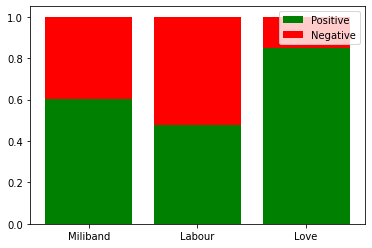

In [13]:
A, B = plotOutput(milibandPos, milibandNeg)
C, D = plotOutput(labourPos, labourNeg)
E, F = plotOutput(lovePos, loveNeg)


plt.bar("Miliband", A, color = "green", label = "Positive") #a bit cheaty to use one label for all...
plt.bar("Miliband", B, color = "red", label = "Negative", bottom = A)

plt.bar("Labour", C, color = "green")
plt.bar("Labour", D, color = "red", bottom = C)

plt.bar("Love", E, color = "green")
plt.bar("Love", F, color = "red", bottom = E)

plt.legend(loc="best")


plt.show()

Well, here we have the positive and negative averages of "Miliband", "Labour" and "Love".
So it seems like Twitter is more in favour of Miliband than of the party itself.